In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from library.sb_utils import save_file
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from scipy.stats import lognorm
from scipy.stats import uniform

In [2]:
df = pd.read_excel('apportionment-2020-tableC2.xlsx')
df


,U.S. Department of Commerce,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,This cell is intentionally blank.,...,Unnamed: 43,Unnamed: 44,This cell is intentionally blank..4,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,U.S. Census Bureau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table C2. Apportionment Population and Number ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table C2. Apportionment Population and Number ...,...,NaN,NaN,Table C2. Apportionment Population and Number ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,State,2020,NaN,NaN,NaN,2010,NaN,NaN,NaN,State,...,NaN,NaN,State,1920 2,NaN,NaN,1910 3,NaN,NaN,NaN
3,NaN,2020: Apportionment population,2020: \nNumber of representatives,2020: \nSeat change,2020: Average persons per representative,2010: Apportionment population,2010: \nNumber of representatives,2010: \nSeat change,2010: Average persons per representative,NaN,...,1930: \nSeat change,1930: Average persons per representative,NaN,1920: Apportionment population,1920: \nNumber of representatives,1920: Average persons per representative,1910: Apportionment population,1910: \nNumber of representatives,1910: \nSeat change\n(since 1900),1910: Average persons per representative
4,Alabama,5030053,7,0,718579,4802982,7,0,686140,Alabama,...,-1,294027,Alabama,2348174,10,234817,2138093,10,1,213809
5,Alaska,736081,1,0,736081,721523,1,0,721523,Alaska,...,X,X,Alaska,X,X,X,X,X,X,X
6,Arizona,7158923,9,0,795436,6412700,9,1,712522,Arizona,...,0,389375,Arizona,309495,1,309495,X,X,X,X
7,Arkansas,3013756,4,0,753439,2926229,4,0,731557,Arkansas,...,0,264921,Arkansas,1752204,7,250315,1574449,7,0,224921
8,California,39576757,52,-1,761091,37341989,53,0,704566,California,...,9,283412,California,3426031,11,311457,2376561,11,3,216051
9,Colorado,5782171,8,1,722771,5044930,7,0,720704,Colorado,...,0,258712,Colorado,939161,4,234790,798572,4,1,199643


In [3]:
df.columns = df.iloc[2]
states=df.iloc[:,0]
df = df[[2020,2010,2000,1990,1980,1970,'1960 1']].iloc[4:-3]
df['State'] = states
df.set_index('State',inplace=True)
df.rename({'1960 1':1960},axis=1,inplace=True)
df

2,2020,2010,2000,1990,1980,1970,1960
State,,,,,,,
Alabama,5030053,4802982,4461130,4062608,3890061,3475885,3266740
Alaska,736081,721523,628933,551947,400481,304067,226167
Arizona,7158923,6412700,5140683,3677985,2717866,1787620,1302161
Arkansas,3013756,2926229,2679733,2362239,2285513,1942303,1786272
California,39576757,37341989,33930798,29839250,23668562,20098863,15717204
Colorado,5782171,5044930,4311882,3307912,2888834,2226771,1753947
Connecticut,3608298,3581628,3409535,3295669,3107576,3050693,2535234
Delaware,990837,900877,785068,668696,595225,551928,446292
Florida,21570527,18900773,16028890,13003362,9739992,6855702,4951560


In [4]:
apportionment = df[[2020]]

In [5]:
apportionment.columns = ['pop']

In [6]:
apportionment

,pop
State,
Alabama,5030053
Alaska,736081
Arizona,7158923
Arkansas,3013756
California,39576757
Colorado,5782171
Connecticut,3608298
Delaware,990837
Florida,21570527


In [7]:
apportionment = apportionment.sort_values(by=['pop'])


In [8]:
apportionment

,pop
State,
Wyoming,577719
Vermont,643503
Alaska,736081
North Dakota,779702
South Dakota,887770
Delaware,990837
Montana,1085407
Rhode Island,1098163
Maine,1363582


In [9]:
def webster_for_families(population, s_in,beta=1,pop_g=1,sigma=1):
    quota = pd.DataFrame()
    family= pd.DataFrame()
    quota['quota'] = population*s_in/np.sum(population)
    quota['family'] = quota['quota'].apply(np.floor).astype('int')
    family = pd.DataFrame(quota.groupby('family').sum())
    family['seats'] = family['quota'].round().astype('int')
    family['number'] = quota['family'].value_counts()
    last_fam=-1
    W_F = np.empty(len(population)).astype(int)
    for j,state in enumerate(quota.index):
        if quota.loc[state,'family'] != last_fam:
            order=1
        else: 
            order +=1
        last_fam = quota.loc[state,'family']
        if order <= family.loc[last_fam,'number']*(last_fam+1)-family.loc[last_fam,'seats']:
            W_F[j]=last_fam
        else:
            W_F[j]=last_fam+1  
    return W_F

In [10]:
def hamilton_for_families(population, s_in,r):
    quota = pd.DataFrame()
    family= pd.DataFrame()
    quota['quota'] = population*s_in/np.sum(population)
    quota['family'] = quota['quota'].apply(np.floor).astype('int')
    family = pd.DataFrame(quota.groupby('family').sum())
    family['seats'] = hamilton_for_states(family['quota'],s_in,r)
    family['number'] = quota['family'].value_counts()
    last_fam=-1
    W_F = np.empty(len(population)).astype(int)
    for j,state in enumerate(quota.index):
        if quota.loc[state,'family'] != last_fam:
            order=1
        else: 
            order +=1
        last_fam = quota.loc[state,'family']
        if order <= family.loc[last_fam,'number']*(last_fam+1)-family.loc[last_fam,'seats']:
            W_F[j]=last_fam
        else:
            W_F[j]=last_fam+1  
    return W_F


In [11]:
def adams(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    seats = np.ceil(quota,dtype='float64')
    return seats

In [12]:
def jefferson(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    seats = np.floor(quota,dtype='float64')
    return seats

In [13]:
def beta_apportionment(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    family = np.floor(quota,dtype='float64')
    if beta == -1:
        rounding_mark = [0  if family[i] ==0 else 1/(np.log(family[i]+1)-np.log(family[i])) for i in range(len(population))]   
    elif beta <0:
        rounding_mark = [0  if family[i] ==0 else (((family[i]+1)**(beta+1)-family[i]**(beta+1))/(beta+1))**(1/beta) for i in range(len(population))]
    elif beta ==0 :
        rounding_mark = [np.exp(-1) if family[i] ==0 else np.exp((family[i]+1)*np.log(family[i]+1)-family[i]*np.log(family[i])-1) for i in range(len(population))]
    else: 
        rounding_mark = (((family+1)**(beta+1)-family**(beta+1))/(beta+1))**(1/beta)
    seats = family +np.heaviside(quota-rounding_mark,1)
    return seats

In [14]:
def lognormal_apportionment(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    q_g = pop_g*s_in/np.sum(population)
    family = np.floor(quota,dtype='float64')
    x = (family+1)*lognorm.cdf(family+1,sigma,scale=q_g) - family*lognorm.cdf(family,sigma,scale=q_g) - q_g*np.exp(0.5*sigma**2)*(lognorm.cdf(family+1,sigma,scale=q_g*np.exp(sigma**2)) -lognorm.cdf(family,sigma,scale=q_g*np.exp(sigma**2)))
    rounding_mark = lognorm.ppf(x, sigma,scale=q_g)
    seats = family +np.heaviside(quota-rounding_mark,1)
    return seats

In [15]:
def divisor_method(population, s_tot, apportionment_function,beta=1,pop_g=1,sigma=1):
    s_in = s_tot
    s_small = 0
    s_big= s_tot*2
    s_out=0
    seats = np.empty(len(population))
    while s_out != s_tot :
        seats = apportionment_function(population,s_in,beta,pop_g,sigma)
        s_out=np.sum(seats)
        if s_out > s_tot: 
            s_big = s_in
            s_in = max([(s_small+s_in)/2,s_in-1])
        elif s_out<s_tot:
            s_small = s_in
            s_in = min([(s_big+s_in)/2,s_in+1])
        else: return s_in, seats
        


In [16]:
def hamilton_for_states(population,s_in,r):
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    family = np.floor(quota,dtype='float64')
    rounding_mark = family + r
    seats = family +np.heaviside(quota-rounding_mark,1)
    return seats
    

In [17]:
def hamilton_method(population, s_tot, apportionment_function):
    r_small = 0.0
    r_big= 1.0
    s_out=0
    seats = np.empty(len(population))
    while s_out != s_tot :
        r = (r_big+r_small)/2
        seats = apportionment_function(population,s_tot,r)
        s_out=np.sum(seats)
        if s_out > s_tot: 
            r_small=r
        elif s_out<s_tot:
            r_big = r
        else: 
            return s_tot, seats
        

In [18]:
s_tot=435
wf_s_in, wf_seats = divisor_method(apportionment['pop'], s_tot,webster_for_families)
apportionment['WF'] =wf_seats
Adams_s_in, Adams_seats = divisor_method(apportionment['pop'], s_tot,adams)
apportionment['Ad'] =Adams_seats.astype('int')
s_in= np.empty(5)
seats = np.empty([5,len(apportionment['pop'])])
for beta in range(-2,3):
    s_in[beta], seats[beta] = divisor_method(apportionment['pop'], s_tot,beta_apportionment,beta=beta)
    apportionment[str(beta)] =seats[beta].astype('int')
Jefferson_s_in, Jefferson_seats = divisor_method(apportionment['pop'], s_tot,jefferson)
apportionment['Jf'] =Jefferson_seats.astype('int')
Ham_s_in, Ham_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_states)
apportionment['HS'] =Ham_seats.astype('int')
HamF_s_in, HamF_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_families)
apportionment['HF'] =HamF_seats.astype('int')
logpop= np.log(apportionment['pop'].astype('float'))
mean = np.mean(logpop)
std = np.std(logpop)
pop_g=np.exp(mean)
ln_s_in, ln_seats = divisor_method(apportionment['pop'], s_tot,lognormal_apportionment,pop_g=pop_g,sigma=std)
apportionment['LN'] =ln_seats.astype('int')
apportionment['q'] = (apportionment['pop']*s_tot/apportionment['pop'].sum()).astype('float')
apportionment['f'] = apportionment['q'].apply(np.floor).astype('int')
print(apportionment)

                     pop  WF  Ad  -2  -1   0   1   2  Jf  HS  HF  LN  \
State                                                                  
Wyoming           577719   1   1   1   1   1   1   1   0   1   1   1   
Vermont           643503   1   1   1   1   1   1   1   0   1   1   1   
Alaska            736081   1   1   1   1   1   1   1   1   1   1   1   
North Dakota      779702   1   1   1   1   1   1   1   1   1   1   1   
South Dakota      887770   1   2   1   1   1   1   1   1   1   1   1   
Delaware          990837   1   2   1   1   1   1   1   1   1   1   1   
Montana          1085407   1   2   2   1   1   1   1   1   1   1   1   
Rhode Island     1098163   2   2   2   1   1   1   1   1   1   2   1   
Maine            1363582   2   2   2   2   2   2   2   1   2   2   2   
New Hampshire    1379089   2   2   2   2   2   2   2   1   2   2   2   
Hawaii           1460137   2   2   2   2   2   2   2   2   2   2   2   
West Virginia    1795045   2   3   2   2   2   2   2   2   2   2

In [19]:
family = apportionment.drop('pop',axis=1).groupby('f').sum()
print(family)
#family = apportionment.groupby('family').apply(lambda s:pd.Series({'population': s['population'].sum(),'quota': s['quota'].sum(),'WS': s['W_S'].sum()}))
#beta=0.001
#s_in, seats = divisor_method(apportionment['population'], s_tot,beta_apportionment,beta)
#apportionment['beta= '+ str(beta)] =seats
#beta=-0.001
#s_in, seats = divisor_method(apportionment['population'], s_tot,beta_apportionment,beta)
#apportionment['beta= '+ str(beta)] =seats
#print(apportionment)



#apportionment.sum()
#s_tot=435
#pop_tot=apportionment['population'].sum()
#ws_s_in, ws_seats = divisor_method(apportionment['population'], s_tot,beta_apportionment)
#apportionment['W_S'] =ws_seats
#print(apportionment)
#family = apportionment.groupby('family').apply(lambda s:pd.Series({'population': s['population'].sum(),'quota': s['quota'].sum(),'WS': s['W_S'].sum()}))
#print(family)

    WF  Ad  -2  -1   0   1   2  Jf  HS  HF  LN          q
f                                                        
0    3   3   3   3   3   3   3   1   3   3   3   2.571444
1   12  15  13  11  11  11  11   9  11  12  11  11.882629
2   10  12  10  10  10  10  10   8  10  10  10  10.142264
3   12  12  12  12  12  12  12  12  12  12  12  11.716895
4   17  18  17  17  17  17  17  17  17  17  17  17.321280
5   17  17  17  17  17  17  17  16  17  17  17  16.703730
6   19  20  20  20  20  20  20  19  20  19  20  19.465108
7   23  24  24  24  24  24  24  23  24  23  24  22.845650
8   25  25  25  25  25  25  25  25  25  25  25  25.140072
9   28  27  27  27  27  27  27  27  27  28  27  27.732730
10  10  10  10  10  10  10  10  10  10  10  10  10.136971
11  11  11  11  11  11  11  11  12  11  11  11  11.370069
12  12  12  12  12  12  12  12  12  12  12  12  12.210817
13  27  27  27  27  27  27  27  28  27  27  27  26.982700
14  14  14  14  14  14  14  14  14  14  14  14  14.090533
15  16  15  15

In [20]:
bias=pd.DataFrame()
for j in range(12):
    bias.loc[:,j] = family.iloc[:,j]- family.iloc[:,11]
bias.columns= family.columns
print(bias)



error=pd.DataFrame()

for j in range(12):
    error.loc[:,j] = np.abs(family.iloc[:,j]- family.iloc[:,11])
error.columns = family.columns
print (error.sum())

#s_tot=435
#pop_tot=apportionment['population'].sum()
#hh_s_in, hh_seats = divisor_method(apportionment['population'], s_tot,beta_apportionment,beta=-2)
#apportionment['HH'] =hh_seats
#print(apportionment)
#family = apportionment.groupby('family').apply(lambda s:pd.Series({'population': s['population'].sum(),'quota': s['quota'].sum(),'WS': s['W_S'].sum()}))
#print(family)

          WF        Ad        -2        -1         0         1         2  \
f                                                                          
0   0.428556  0.428556  0.428556  0.428556  0.428556  0.428556  0.428556   
1   0.117371  3.117371  1.117371 -0.882629 -0.882629 -0.882629 -0.882629   
2  -0.142264  1.857736 -0.142264 -0.142264 -0.142264 -0.142264 -0.142264   
3   0.283105  0.283105  0.283105  0.283105  0.283105  0.283105  0.283105   
4  -0.321280  0.678720 -0.321280 -0.321280 -0.321280 -0.321280 -0.321280   
5   0.296270  0.296270  0.296270  0.296270  0.296270  0.296270  0.296270   
6  -0.465108  0.534892  0.534892  0.534892  0.534892  0.534892  0.534892   
7   0.154350  1.154350  1.154350  1.154350  1.154350  1.154350  1.154350   
8  -0.140072 -0.140072 -0.140072 -0.140072 -0.140072 -0.140072 -0.140072   
9   0.267270 -0.732730 -0.732730 -0.732730 -0.732730 -0.732730 -0.732730   
10 -0.136971 -0.136971 -0.136971 -0.136971 -0.136971 -0.136971 -0.136971   
11 -0.370069

In [21]:
logpop= np.log(apportionment['pop'].astype('float'))

In [22]:
mean = np.mean(logpop)
std = np.std(logpop)
pop_g=np.exp(mean)

In [23]:
lns = np.log(np.random.lognormal(mean=mean, sigma=std, size=10000))

(array([0.00327019, 0.03513117, 0.1922871 , 0.36719548, 0.26292318,
        0.06820679, 0.00532574]),
 array([11.30372451, 12.37399912, 13.44427374, 14.51454835, 15.58482297,
        16.65509758, 17.7253722 , 18.79564681]),
 [<matplotlib.patches.Polygon at 0x7fa1dcd3cee0>])

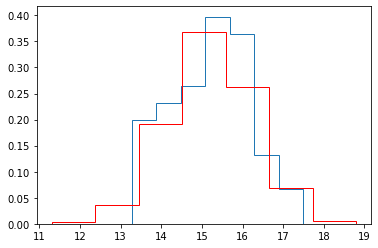

In [24]:
plt.hist(logpop,bins=7,histtype='step',density=True)
plt.hist(lns,bins=7,histtype='step',color='r',density=True)

In [25]:
x = np.sort(logpop)
x2= np.sort(lns)

In [26]:
y=(np.arange(0,len(x))+0.5)/len(x)
y2=(np.arange(0,len(x2))+0.5)/len(x2)
a,b = np.polyfit(x,y,1)
y3=np.array([0,1])
x3=(y3-b)/a

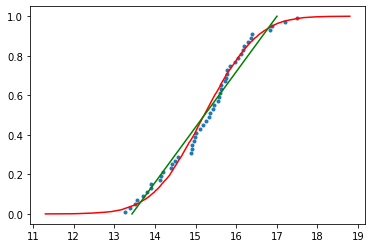

In [27]:
plt.plot(x,y,marker='.',linestyle='none')
plt.plot(x2,y2,c='r')
plt.plot()
plt.plot(x3,y3,c='g')

In [28]:
#ln_s_in, ln_seats = divisor_method(apportionment['pop'], s_tot,lognormal_apportionment,pop_g=pop_g,sigma=std)
#apportionment['LN'] =ln_seats.astype('int')
#print(apportionment)

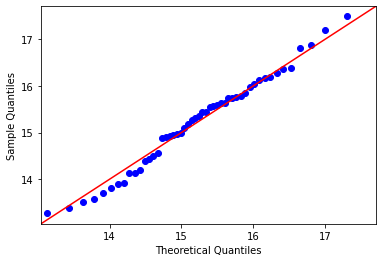

In [29]:
fig = sm.qqplot(x, line='45', loc = mean, scale = std)

In [32]:
logpops = np.log(df.astype('float'))
print (logpops)

2                    2020       2010       2000       1990       1980  \
State                                                                   
Alabama         15.430941  15.384748  15.310913  15.217336  15.173935   
Alaska          13.509095  13.489120  13.351780  13.221207  12.900422   
Arizona         15.783870  15.673791  15.452697  15.117876  14.815358   
Arkansas        14.918698  14.889225  14.801228  14.675120  14.642101   
California      17.493753  17.435629  17.339834  17.211335  16.979658   
Colorado        15.570290  15.433894  15.276885  15.011828  14.876364   
Connecticut     15.098747  15.091328  15.042086  15.008120  14.949354   
Delaware        13.806305  13.711124  13.573526  13.413085  13.296695   
Florida         16.886838  16.754713  16.589903  16.380718  16.091751   
Georgia         16.188114  16.090474  15.920495  15.688607  15.513740   
Hawaii          14.194041  14.128028  14.011605  13.924611  13.779883   
Idaho           14.426024  14.268812  14.075776  13

In [35]:
logpops = logpops - logpops.mean()
logpops.mean()

2
2020    8.881784e-17
2010   -5.329071e-17
2000    0.000000e+00
1990   -3.552714e-17
1980   -2.664535e-17
1970   -1.332268e-17
1960    8.881784e-18
dtype: float64

In [36]:
logpops = logpops/logpops.std()

In [37]:
logpops.std()

2
2020    1.0
2010    1.0
2000    1.0
1990    1.0
1980    1.0
1970    1.0
1960    1.0
dtype: float64

In [38]:
logpops


2,2020,2010,2000,1990,1980,1970,1960
State,,,,,,,
Alabama,0.207694,0.224663,0.243954,0.273914,0.317760,0.326603,0.389058
Alaska,-1.669804,-1.635771,-1.677233,-1.687665,-1.909446,-1.966112,-2.103995
Arizona,0.552479,0.508341,0.382991,0.176175,-0.033514,-0.299156,-0.469666
Arkansas,-0.292729,-0.261659,-0.255859,-0.258916,-0.203242,-0.221060,-0.174540
California,2.222904,2.237469,2.233577,2.233401,2.086703,1.977958,1.855760
Colorado,0.343827,0.272898,0.210585,0.071963,0.026249,-0.092440,-0.191590
Connecticut,-0.116835,-0.063309,-0.019666,0.068319,0.097753,0.203816,0.152376
Delaware,-1.379452,-1.417888,-1.459782,-1.499108,-1.521244,-1.405091,-1.469406
Florida,1.629995,1.569195,1.498172,1.417161,1.216881,0.965789,0.777365


In [50]:
logpops = pd.DataFrame(logpops)

In [51]:
logpops

2,2020,2010,2000,1990,1980,1970,1960
State,,,,,,,
Alabama,0.207694,0.224663,0.243954,0.273914,0.317760,0.326603,0.389058
Alaska,-1.669804,-1.635771,-1.677233,-1.687665,-1.909446,-1.966112,-2.103995
Arizona,0.552479,0.508341,0.382991,0.176175,-0.033514,-0.299156,-0.469666
Arkansas,-0.292729,-0.261659,-0.255859,-0.258916,-0.203242,-0.221060,-0.174540
California,2.222904,2.237469,2.233577,2.233401,2.086703,1.977958,1.855760
Colorado,0.343827,0.272898,0.210585,0.071963,0.026249,-0.092440,-0.191590
Connecticut,-0.116835,-0.063309,-0.019666,0.068319,0.097753,0.203816,0.152376
Delaware,-1.379452,-1.417888,-1.459782,-1.499108,-1.521244,-1.405091,-1.469406
Florida,1.629995,1.569195,1.498172,1.417161,1.216881,0.965789,0.777365


In [53]:
logpops.columns

Int64Index([2020, 2010, 2000, 1990, 1980, 1970, 1960], dtype='int64', name=2)

In [55]:
logpops[2020]

State
Alabama           0.207694
Alaska           -1.669804
Arizona           0.552479
Arkansas         -0.292729
California        2.222904
Colorado          0.343827
Connecticut      -0.116835
Delaware         -1.379452
Florida           1.629995
Georgia           0.947394
Hawaii           -1.000664
Idaho            -0.774034
Illinois          1.121889
Indiana           0.500831
Iowa             -0.236470
Kansas           -0.316648
Kentucky          0.100936
Louisiana         0.133350
Maine            -1.067500
Maryland          0.409665
Massachusetts     0.535207
Michigan          0.887206
Minnesota         0.331514
Mississippi      -0.309021
Missouri          0.405708
Montana          -1.290396
Nebraska         -0.711384
Nevada           -0.262502
New Hampshire    -1.056453
New Jersey        0.807517
New Mexico       -0.636281
New York          1.566626
North Carolina    0.922362
North Dakota     -1.613561
Ohio              1.041419
Oklahoma         -0.025106
Oregon            0.04

In [56]:
logpopslist = np.empty_like(logpops[2020])

In [57]:
logpopslist.append(logpops[2020])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [80]:
logpopslist = np.append([logpops[2020]],[logpops[2010],logpops[2000],logpops[1990],logpops[1980],logpops[1970],logpops[1960]])

In [81]:
logpopslist

array([ 0.20769384, -1.6698037 ,  0.55247876, -0.29272912,  2.22290433,
        0.34382696, -0.11683484, -1.37945218,  1.62999524,  0.94739398,
       -1.00066397, -0.77403378,  1.12188932,  0.50083134, -0.23647028,
       -0.31664754,  0.10093627,  0.13334981, -1.06750045,  0.40966455,
        0.53520721,  0.88720649,  0.33151417, -0.30902075,  0.40570844,
       -1.2903955 , -0.71138375, -0.26250218, -1.05645331,  0.80751706,
       -0.63628141,  1.56662623,  0.92236196, -1.61356059,  1.0414191 ,
       -0.02510624,  0.04111503,  1.13619143, -1.27898136,  0.22590743,
       -1.48675494,  0.51888009,  1.92528855, -0.21144153, -1.80111549,
        0.73782543,  0.62567924, -0.7989293 ,  0.36311607, -1.90646611,
        0.22466343, -1.63577096,  0.50834057, -0.26165928,  2.23746886,
        0.27289779, -0.06330857, -1.41788814,  1.56919493,  0.91728787,
       -1.0087241 , -0.87055366,  1.19159733,  0.52185014, -0.21978354,
       -0.2828196 ,  0.12757815,  0.1724125 , -1.03328945,  0.40

In [82]:
logpopslist = np.sort(logpopslist)
logpopslist

array([-2.10399495, -1.96611185, -1.9114593 , -1.90944603, -1.90646611,
       -1.88721451, -1.87537281, -1.87292376, -1.87005386, -1.80111549,
       -1.76837221, -1.75106437, -1.75094062, -1.70738321, -1.69987012,
       -1.68766489, -1.67723261, -1.6698328 , -1.6698037 , -1.66475836,
       -1.65438877, -1.63577096, -1.61356059, -1.60072873, -1.59556898,
       -1.54011851, -1.52124431, -1.5124962 , -1.51049226, -1.49910844,
       -1.49564714, -1.48675494, -1.46940554, -1.45978198, -1.45415092,
       -1.43095121, -1.41788814, -1.40509094, -1.37945218, -1.37624898,
       -1.32093529, -1.32002861, -1.31844988, -1.2903955 , -1.28932126,
       -1.27898136, -1.26266311, -1.24803015, -1.23259416, -1.21811079,
       -1.18238358, -1.17932791, -1.17495461, -1.15503345, -1.14392148,
       -1.14344036, -1.1211891 , -1.0977851 , -1.09402988, -1.09398943,
       -1.09193949, -1.08344771, -1.07552963, -1.07371222, -1.0695187 ,
       -1.06750045, -1.06618365, -1.05645331, -1.04789745, -1.04

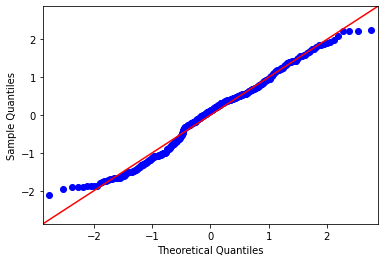

In [83]:
fig = sm.qqplot(logpopslist, line='45')


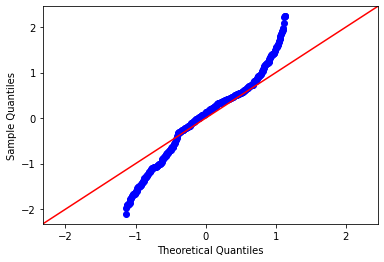

In [98]:
fig = sm.qqplot(logpopslist,uniform,loc = -(3/2)**(1/3),scale = 2*(3/2)**(1/3), line='45')

(array([0.00140647, 0.        , 0.        , 0.00281294, 0.00281294,
        0.00140647, 0.00421941, 0.00281294, 0.00562588, 0.01265823,
        0.01687763, 0.01265823, 0.01265823, 0.01687763, 0.0182841 ,
        0.02109704, 0.03375527, 0.0323488 , 0.04781996, 0.03516174,
        0.04922643, 0.06188466, 0.06891701, 0.09845287, 0.0970464 ,
        0.11673697, 0.11392403, 0.14345989, 0.15471165, 0.11673697,
        0.16736988, 0.17299575, 0.20534455, 0.21800278, 0.23909982,
        0.2630098 , 0.29957801, 0.32348799, 0.28129391, 0.3094233 ,
        0.33192681, 0.3741209 , 0.36286914, 0.38255972, 0.36708855,
        0.40225029, 0.42194086, 0.41068911, 0.40225029, 0.392405  ,
        0.38959206, 0.41490851, 0.37834031, 0.39099853, 0.39381147,
        0.35864973, 0.35583679, 0.30801683, 0.31223624, 0.25738393,
        0.30098448, 0.25457099, 0.26441627, 0.230661  , 0.19831221,
        0.161744  , 0.19127986, 0.16596341, 0.15471165, 0.11954991,
        0.10970462, 0.0970464 , 0.0829817 , 0.08

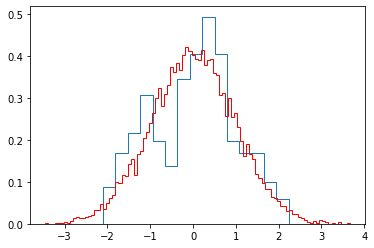

In [84]:
plt.hist(logpopslist,bins=15,histtype='step',density=True)
plt.hist(lns,bins=100,histtype='step',color='r',density=True)

In [85]:
lns = np.log(np.random.lognormal(size=10000))

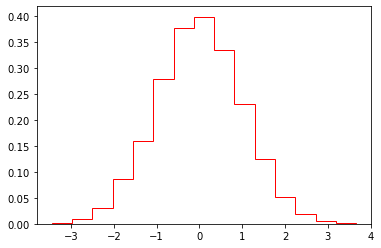

In [68]:
x=plt.hist(lns,bins=15,histtype='step',color='r',density=True)

In [86]:
x = np.sort(logpopslist)
x2= np.sort(lns)

In [87]:
y=(np.arange(0,len(x))+0.5)/len(x)
y2=(np.arange(0,len(x2))+0.5)/len(x2)
a,b = np.polyfit(x,y,1)
y3=np.array([0,1])
x3=(y3-b)/a

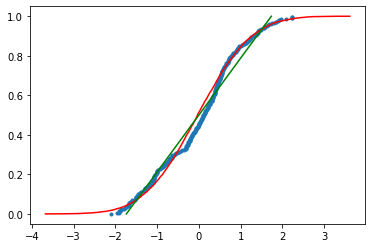

In [88]:
plt.plot(x,y,marker='.',linestyle='none')
plt.plot(x2,y2,c='r')
plt.plot()
plt.plot(x3,y3,c='g')

In [89]:
allpopslist = np.exp(logpopslist)

In [90]:
allpopslist

array([0.1219682 , 0.14000014, 0.14786445, 0.14816244, 0.14860461,
       0.1514932 , 0.1532978 , 0.1536737 , 0.15411536, 0.1651146 ,
       0.17061048, 0.17358908, 0.17361057, 0.1813397 , 0.18270725,
       0.1849509 , 0.18689046, 0.18827854, 0.18828402, 0.18923638,
       0.19120889, 0.19480213, 0.19917716, 0.20174944, 0.20279311,
       0.2143557 , 0.21843991, 0.22035923, 0.22080126, 0.22332918,
       0.22410353, 0.22610519, 0.23006221, 0.23228691, 0.23359862,
       0.2390814 , 0.24222502, 0.24534474, 0.25171641, 0.252524  ,
       0.26688557, 0.26712766, 0.26754972, 0.27516193, 0.27545768,
       0.27832066, 0.28289963, 0.28706972, 0.29153531, 0.29578845,
       0.30654719, 0.30748533, 0.308833  , 0.315047  , 0.31856731,
       0.31872062, 0.32589205, 0.33360918, 0.33486431, 0.33487785,
       0.33556504, 0.33842671, 0.34111704, 0.34173756, 0.34317365,
       0.34386696, 0.34432006, 0.34768676, 0.35067428, 0.35278781,
       0.35583453, 0.35694   , 0.36320299, 0.36468398, 0.36763

In [93]:
apportionment=pd.DataFrame()
apportionment['pop'] = allpopslist
print(apportionment)

          pop
0    0.121968
1    0.140000
2    0.147864
3    0.148162
4    0.148605
..        ...
345  8.058305
346  9.234111
347  9.331547
348  9.333188
349  9.369586

[350 rows x 1 columns]


In [94]:
s_tot=435*7
wf_s_in, wf_seats = divisor_method(apportionment['pop'], s_tot,webster_for_families)
apportionment['WF'] =wf_seats
Adams_s_in, Adams_seats = divisor_method(apportionment['pop'], s_tot,adams)
apportionment['Ad'] =Adams_seats.astype('int')
s_in= np.empty(5)
seats = np.empty([5,len(apportionment['pop'])])
for beta in range(-2,3):
    s_in[beta], seats[beta] = divisor_method(apportionment['pop'], s_tot,beta_apportionment,beta=beta)
    apportionment[str(beta)] =seats[beta].astype('int')
Jefferson_s_in, Jefferson_seats = divisor_method(apportionment['pop'], s_tot,jefferson)
apportionment['Jf'] =Jefferson_seats.astype('int')
Ham_s_in, Ham_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_states)
apportionment['HS'] =Ham_seats.astype('int')
HamF_s_in, HamF_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_families)
apportionment['HF'] =HamF_seats.astype('int')
logpop= np.log(apportionment['pop'].astype('float'))
mean = np.mean(logpop)
std = np.std(logpop)
pop_g=np.exp(mean)
ln_s_in, ln_seats = divisor_method(apportionment['pop'], s_tot,lognormal_apportionment,pop_g=pop_g,sigma=std)
apportionment['LN'] =ln_seats.astype('int')
apportionment['q'] = (apportionment['pop']*s_tot/apportionment['pop'].sum()).astype('float')
apportionment['f'] = apportionment['q'].apply(np.floor).astype('int')
print(apportionment)

          pop  WF  Ad  -2  -1   0   1   2  Jf  HS  HF  LN          q   f
0    0.121968   0   1   1   1   1   1   1   0   1   0   1   0.670407   0
1    0.140000   0   1   1   1   1   1   1   0   1   0   1   0.769521   0
2    0.147864   1   1   1   1   1   1   1   0   1   1   1   0.812748   0
3    0.148162   1   1   1   1   1   1   1   0   1   1   1   0.814385   0
4    0.148605   1   1   1   1   1   1   1   0   1   1   1   0.816816   0
..        ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..        ...  ..
345  8.058305  44  42  44  44  44  44  44  46  44  44  44  44.293049  44
346  9.234111  51  48  51  51  51  51  51  53  51  51  51  50.755950  50
347  9.331547  51  49  51  51  51  51  51  54  51  51  51  51.291514  51
348  9.333188  51  49  51  51  51  51  51  54  51  51  51  51.300533  51
349  9.369586  52  49  51  51  51  51  51  54  51  52  51  51.500596  51

[350 rows x 14 columns]


In [95]:
family = apportionment.drop('pop',axis=1).groupby('f').sum()
print(family)

     WF   Ad   -2   -1    0    1    2   Jf   HS   HF   LN           q
f                                                                    
0    12   14   14   14   14   14   14    3   14   12   14   12.001458
1    88  111   92   92   89   89   87   65   88   88   89   88.450746
2    76   87   78   77   77   77   76   67   76   76   77   76.342144
3    38   41   37   37   37   37   37   35   37   38   37   37.598416
4   137  146  136  136  136  136  136  129  136  137  136  137.040475
5   138  144  138  138  138  138  138  133  138  137  138  137.480704
6   136  138  136  136  136  136  136  133  136  136  136  135.805135
7   150  153  153  153  153  153  153  150  153  150  153  149.832408
8   219  219  218  218  219  218  219  218  218  219  219  218.835819
9   199  199  198  198  199  199  199  200  199  199  199  198.589463
10  105  104  106  106  106  106  106  106  106  105  106  105.113036
11  125  123  123  123  123  123  123  126  123  125  123  125.077458
12   75   73   74   

In [96]:
bias=pd.DataFrame()
for j in range(12):
    bias.loc[:,j] = family.iloc[:,j]- family.iloc[:,11]
bias.columns= family.columns
print(bias)



error=pd.DataFrame()

for j in range(12):
    error.loc[:,j] = np.abs(family.iloc[:,j]- family.iloc[:,11])
error.columns = family.columns
print (error.sum())


          WF         Ad        -2        -1         0         1         2  \
f                                                                           
0  -0.001458   1.998542  1.998542  1.998542  1.998542  1.998542  1.998542   
1  -0.450746  22.549254  3.549254  3.549254  0.549254  0.549254 -1.450746   
2  -0.342144  10.657856  1.657856  0.657856  0.657856  0.657856 -0.342144   
3   0.401584   3.401584 -0.598416 -0.598416 -0.598416 -0.598416 -0.598416   
4  -0.040475   8.959525 -1.040475 -1.040475 -1.040475 -1.040475 -1.040475   
5   0.519296   6.519296  0.519296  0.519296  0.519296  0.519296  0.519296   
6   0.194865   2.194865  0.194865  0.194865  0.194865  0.194865  0.194865   
7   0.167592   3.167592  3.167592  3.167592  3.167592  3.167592  3.167592   
8   0.164181   0.164181 -0.835819 -0.835819  0.164181 -0.835819  0.164181   
9   0.410537   0.410537 -0.589463 -0.589463  0.410537  0.410537  0.410537   
10 -0.113036  -1.113036  0.886964  0.886964  0.886964  0.886964  0.886964   